# Task 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import KMeans
from numpy.random import default_rng
from networkx.algorithms import node_classification

In [2]:
#1.1
beer_dat = pd.read_csv('beers.csv')

In [3]:
beer_dat.loc[beer_dat['ABV'] == max(beer_dat['ABV'])]

,Name,Style,Brewery,Description,ABV,Ave Rating,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
474,Schorschbock 57%,Bock - Eisbock,Schorschbräu,Notes:,57.5,2.97,0,7,17,3,9,6,0,10,0,2,4


In [4]:
#1.2
mean_rat = beer_dat['Ave Rating'].mean()
median_rat = beer_dat['Ave Rating'].median()
mean_rat, median_rat

(3.7602392947103276, 3.82)

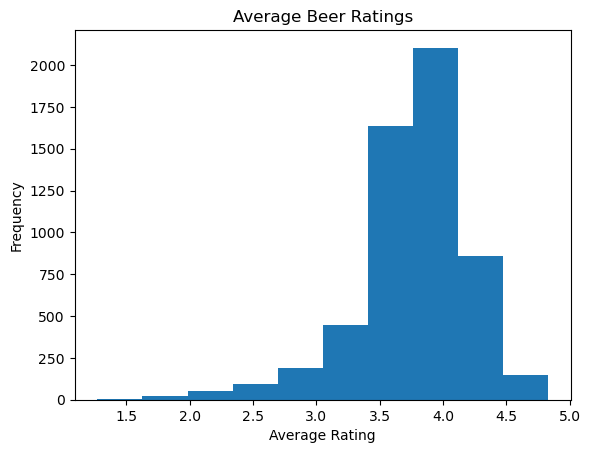

In [5]:
#1.3
plt.hist(beer_dat['Ave Rating'])
plt.title('Average Beer Ratings')
plt.ylabel('Frequency')
plt.xlabel('Average Rating')
plt.show()

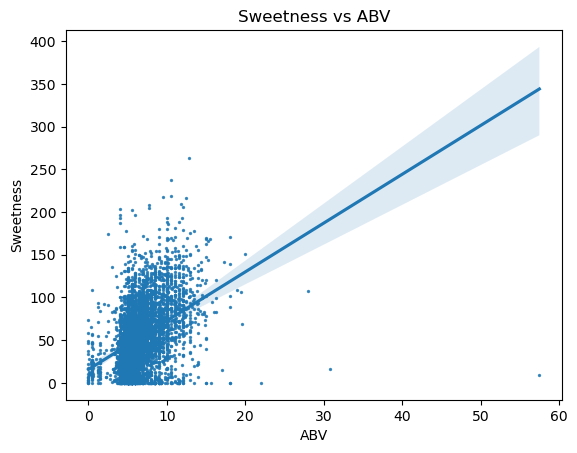

In [6]:
#1.4
#Create a linear plot of Sweetness vs ABV with a line of best fit
sns.regplot(x='ABV',y='Sweet', data=beer_dat, scatter_kws={'s':2})
plt.ylabel('Sweetness')
plt.xlabel('ABV')
plt.title('Sweetness vs ABV')
plt.show()

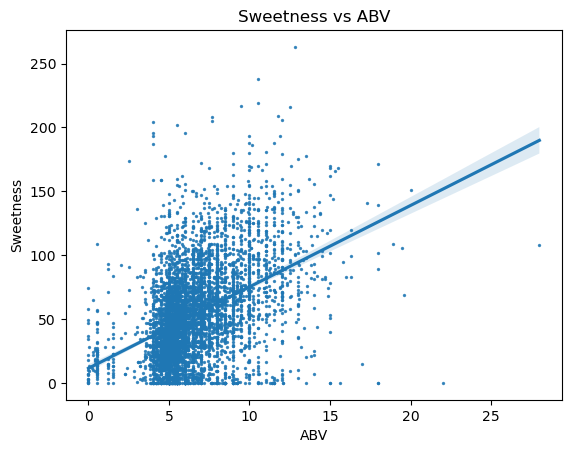

In [7]:
#Do the same as before but remove extreme outliers from the data
nooutliers = beer_dat[beer_dat['ABV'] <= 30]
sns.regplot(x='ABV',y='Sweet', data=nooutliers, scatter_kws={'s':2})
plt.ylabel('Sweetness')
plt.xlabel('ABV')
plt.title('Sweetness vs ABV')
plt.show()

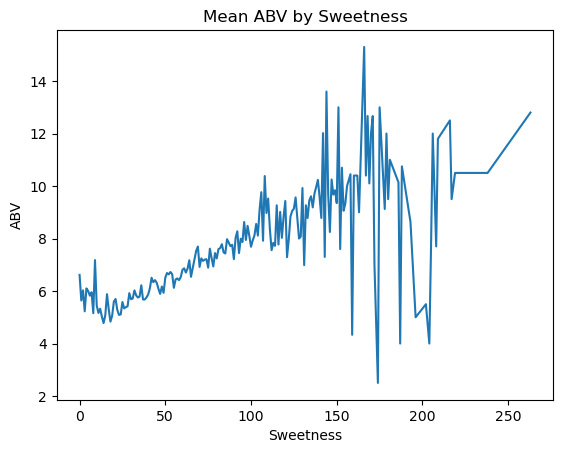

In [8]:
#For each sweetness level, take the mean ABV of all beers of that sweetness and plot as a line graph
mrbs = beer_dat.groupby('Sweet')['ABV'].mean()
sweetnesses = list(mrbs.index)
plt.plot(sweetnesses, mrbs)
plt.ylabel('ABV')
plt.xlabel('Sweetness')
plt.title('Mean ABV by Sweetness')
plt.show()

There appears to be a slight correlation between sweetness and ABV. The linear regression plot shows a positive relationship between sweetness and ABV, This suggests that high values for sweetness will correspond to large values of ABV, although there does seem to be outliers in the data. Removing outliers furthers the claim from above as sweeter beers tend to have larger values for ABV. Similar trends are shown in the line plot, with a visible increase in ABV as sweetness increases. As such, both plots seem to suggest that ABV and Sweetness are positively correlated.

In [9]:
#1.5
#Find all bocks and lambics looking for beers with style that starts with bock or lambic
Bocks = beer_dat[beer_dat['Style'].str.contains('Bock')]
numBocks = len(Bocks)
Lambs = beer_dat[beer_dat['Style'].str.contains('Lambic')]
numLambs = len(Lambs)
print(f"There are {numBocks} beers of style Bock, and {numLambs} beers of style Lambic")

There are 250 beers of style Bock, and 163 beers of style Lambic


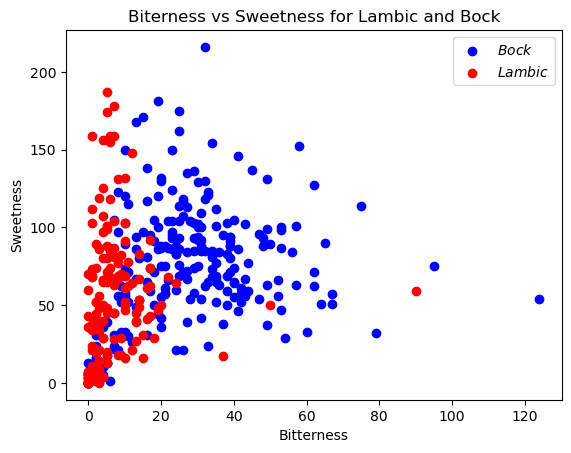

In [10]:
#1.6
fig, ax = plt.subplots()
ax.scatter(Bocks['Bitter'], Bocks['Sweet'], color = 'blue')
ax.scatter(Lambs['Bitter'], Lambs['Sweet'], color = 'red')
ax.set_title('Biterness vs Sweetness for Lambic and Bock')
ax.set_xlabel('Bitterness')
ax.set_ylabel('Sweetness')
ax.legend(['$Bock$', '$Lambic$'],loc='upper right')
plt.show()

Both Lambic and Bock style beers seem to have a wide variety of sweetness, but whereas lambic style tends not to be a bitter beer, Bock style beers tend to be slightly more bitter, and have a relatively large variety of bitterness.

In [11]:
#1.7
BockLamb = pd.concat([Bocks, Lambs]).reset_index()

In [12]:
#Get the style of beer as a list
style = list(BockLamb['Style'])
#Get three columns of interest
sweets = BockLamb['Sweet']
sours = BockLamb['Sour']
bitters = BockLamb['Bitter']
#Use list comprehension to label beers as bock or lambic
labels = np.array(['Bock' if 'Bock' in name else 'Lambic' for name in style])
#Create vectors of interest using list comprehension
vectors = np.array([(bitters[i], sweets[i], sours[i]) for i in range(len(BockLamb))])

In [13]:
#Split into testing and training set
n = len(vectors)
pts = np.random.permutation(n) 
ntrain = int(n*0.8)
ntest = n-ntrain
train = pts[:ntrain]
test = pts[ntrain:]
neigh = KNeighborsClassifier()
#Train
neigh.fit(vectors[train], labels[train])
#test
score =  neigh.score(vectors[test], labels[test])
score

/Users/mattcarr/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.927710843373494

The model completes the task with a high level of accuracy, usually exceding 90%. As such, the Nearest Neighbors model performs well when separating beers into Bocks and Lambics based off of 3 flavor attributes. Using the information from the previous question, we see that Bock and Lambic beers will differ in terms of bitterness and sweetness. As such, since K Nearest Neighbors will label beers based on the labels of those of similar attributes, the high level of unaccuracy is unsurprising since there will be similarity among bocks or lambics and less between the two, with the inaccuracies coming from outliers. For example, from the plot above, we see there are some lambic beers with high values for bitterness when lambics as a whole tend not to be bitter. In this case, K nearest neighbors would be unlikely to categorize it as a lambic. However, these outliers will not have a major affect on the model's accuracy.

In [14]:
#1.8
#Create vectors corresponding to characteristics of beer and labels corresponding to the beer's rating
flavprofs = beer_dat.loc[:, 'Astringency':'Malty']
vecprofs = np.array([list(flavprofs.iloc[i]) for i in range(len(flavprofs))])
labels2 = np.array(beer_dat['Ave Rating'])

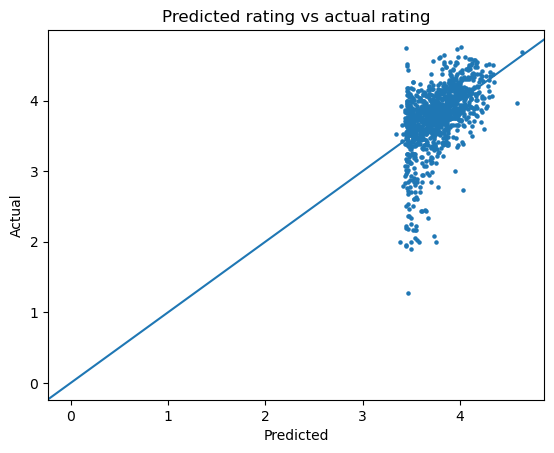

0.26447192971662203


In [15]:
#Create a function that splits data into testing and training, trains the model, and returns the accuracy on the testing set
def LR_SC(vectors, labels):
    n = len(vectors)
    pts = np.random.permutation(n) 
    ntrain = int(n*0.8)
    ntest = n-ntrain
    train = pts[:ntrain]
    test = pts[ntrain:]
    LR = LinearRegression()
    LR.fit(vectors[train], labels[train])
    preds = LR.predict(vectors[test])
    score = r2_score(labels[test], preds)
    return score, preds, labels[test]
score = LR_SC(vecprofs, labels2)
Rsq = score[0]
plt.scatter(score[1], score[2], s = 5)
plt.title('Predicted rating vs actual rating')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.axline((0, 0), slope=1)
plt.show()
print(Rsq)

The R squared value is very small suggesting the model is not very accurate for this dataset, as such a low value for R squared suggests many of the predictions are far off. As can be seen from the plot, the model struggles with poorly rated beers and does not seem to give any beer a rating below a three, leading to extremely inaccurate predictions in these cases. As such, the model is not well-suited to predicting the rating of the beers based on the flavor profiles

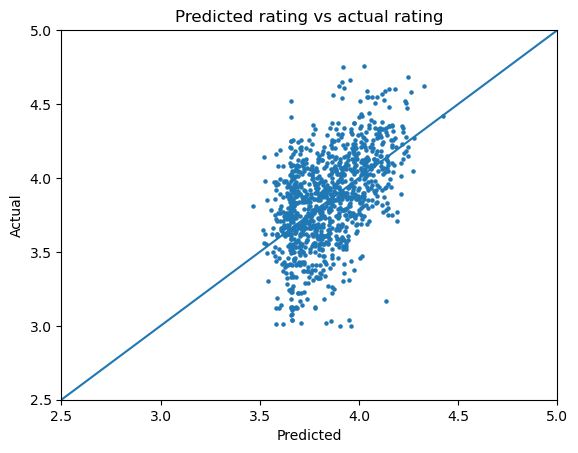

0.24441376522941893


In [16]:
#1.9
#Remove beers with a rating below 3 from the dataset, and get another accuracy
tbeer = beer_dat.loc[beer_dat['Ave Rating'] >= 3]
flavprofs2 = tbeer.loc[:, 'Astringency':'Malty']
vecprofs2 = np.array([list(flavprofs2.iloc[i]) for i in range(len(flavprofs2))])
labels3 = np.array(tbeer['Ave Rating'])
score2 = LR_SC(vecprofs2, labels3)
Rsq2 = score2[0]
plt.scatter(score2[1], score2[2], s = 5)
plt.title('Predicted rating vs actual rating')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.axline((0, 0), slope=1)
plt.xlim([2.5,5])
plt.ylim([2.5,5])
plt.show()
print(Rsq2)

Even excluding beers with ratings below 3, the r squared value remains very similar, suggesting that the model is inaccurate. Although the plot looks slightly improved, there are still lots of discrepancies, suggesting a similar level of accuracy as before. The lack of success in both cases means that flavor profile is likely not a good indicator of a beer's rating, suggesting that beers of similar profile may be ranked differently, and beers of different profile may be ranked similarly. As such, it seems that people's beer rankings are not correlated with the beer's flavor profile and we cannot accurately make a prediction on rating with only the flavor profile

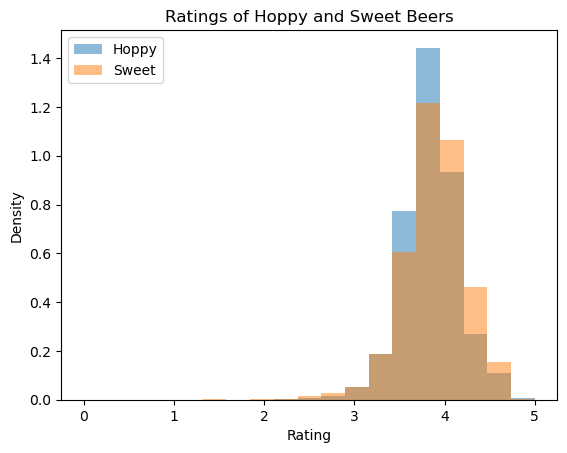

In [17]:
#1.10
#Categorize beers into sweet beers or hoppy beers by considering beers with statistic above third quartile
#Plot histograms of average ratings of the sweet and hoppy beers, using density to account for differences
#in data count
bins = np.linspace(0,5, 20)
ThrQHop = beer_dat['Hoppy'].quantile(0.75)
ThrQSweet = beer_dat['Sweet'].quantile(0.75)
Hoppies = beer_dat[beer_dat['Hoppy'] > ThrQHop]
Sweeties = beer_dat[beer_dat['Sweet'] > ThrQHop]
plt.hist(Hoppies['Ave Rating'], density = True, alpha = 0.5, label = 'Hoppy', bins = bins)
plt.hist(Sweeties['Ave Rating'], density = True, alpha = 0.5, label = 'Sweet', bins = bins)
plt.legend(loc = 'upper left')
plt.ylabel('Density')
plt.xlabel('Rating')
plt.title('Ratings of Hoppy and Sweet Beers')
plt.show()

In [18]:
Hoppies['Ave Rating'].describe()

count    1375.000000
mean        3.848342
std         0.307635
min         2.220000
25%         3.670000
50%         3.850000
75%         4.040000
max         4.760000
Name: Ave Rating, dtype: float64

In [19]:
Sweeties['Ave Rating'].describe()

count    2334.000000
mean        3.896324
std         0.351307
min         1.480000
25%         3.700000
50%         3.900000
75%         4.130000
max         4.760000
Name: Ave Rating, dtype: float64

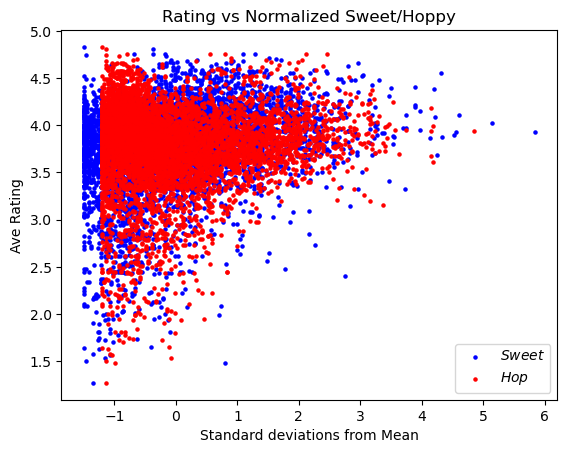

In [20]:
#Normalise the sweetness and hoppiness statistics for all beers to get a sense of beer ratings as a whole
normalsweet = (beer_dat['Sweet']-beer_dat['Sweet'].mean()) / beer_dat['Sweet'].std()
normalhop = (beer_dat['Hoppy']-beer_dat['Hoppy'].mean()) / beer_dat['Hoppy'].std()
fig, ax2 = plt.subplots()
ax2.scatter(normalsweet, beer_dat['Ave Rating'], color = 'blue', s = 5)
ax2.scatter(normalhop, beer_dat['Ave Rating'], color = 'red', s = 5)
ax2.set_title('Rating vs Normalized Sweet/Hoppy')
ax2.set_xlabel('Standard deviations from Mean')
ax2.set_ylabel('Ave Rating')
ax2.legend(['$Sweet$', '$Hop$'],loc='lower right')
plt.show()

People seem to have a slight preference for sweet beers over hoppy beers. For beers with high hoppiness and sweetness, the average ratings were slightly higher for sweet beers with a slightly larger mean, median, and 3rd quartile. This can similarly be seen in the plot of normalised sweetness/hoppiness against average rating, as beers above the mean sweetness seem to be rated slightly higher than beers with above average hoppiness. However, much like the statistics from before, the differences are very slight, so any difference in preference seems to be marginal.

In [21]:
#1.11

In [22]:
#Create a dataframe of beers rated above or at 4 and below or at 3
extremes = beer_dat.loc[(beer_dat['Ave Rating'] >= 4) | (beer_dat['Ave Rating'] <= 3)].reset_index(drop = True)
#Label each beer based on its rating
def labeller (n):
    if n >= 4:
        return 1
    else:
        return 0
extremes['Label'] = extremes['Ave Rating'].apply(labeller)
#Train a K nearest Neighbors model
lab = np.array(extremes['Label'])
stats = extremes.loc[:, 'ABV': 'Malty'].drop(columns = 'Ave Rating')
bstats = np.array([list(stats.iloc[i]) for i in range(len(stats))])
m = len(bstats)
points = np.random.permutation(m) 
mtrain = int(n*0.8)
mtest = m-mtrain
training = points[:mtrain]
testing = points[mtrain:]
n2 = KNeighborsClassifier()
n2.fit(bstats[training], lab[training])
n2.score(bstats[testing], lab[testing])

/Users/mattcarr/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9213197969543148

The K Nearest Neighbor Model performs relatively well, usually reporting an accuracy around 90%. As such, the model is able to provide relatively accurate groupings of beers into strong and weak ratings based off of the beer's characteristics. This model suits this scenario as it would be reasonable to assume that beers with similar characteristics would receive similar ratings especially considering the relatively large gap in ratings. As such, a logical method to predict ratings of beers would be to consider the beer's with similar profiles and assign a similar label. Thus, k nearest neighbors is a good choice for the model, as the model will predict labels using similar logic to above, choosing the label of a beer based of the labels of beers that are similar to the given point. This means our model should predict similar beers to have similar ratings, which should perform well if our ideas above are true. Further, as we already have the ratings of the beers available to us, a supervised learning model is sensible, and should outperform unsupervised learning. The accuracy, as aforementioned is relatively good and the model performs as expected. In the context of beer ratings, one should expect that beers similar to highly rated beers are also highly rated, but there will be cases where that is not true. As such, we can see that the score of around 0.9 reflects the expectations and so gives a good idea on how similar beers are rated. 

# Task 2

In [23]:
#2.1
edat = pd.read_csv('emails.txt', sep = ' ', header = None)
edat.columns = ['Sender ID', 'Receiver ID', 'Time']

In [24]:
#2.2
#Create a list of all pairs recorded in the data and create a set of all unique pairs
pairs = [tuple((edat['Sender ID'][i], edat['Receiver ID'][i])) for i in range(len(edat))]
combos = set(pairs)

In [25]:
#Count the amount of times each pair appears and create a dataframe
freq = [pairs.count(poss) for poss in combos]
pairframe = pd.DataFrame({'Pair': list(combos), 'Emails':freq})

In [26]:
#2.3

In [27]:
#Create a graph based on pairs in the data
G = nx.Graph()
G.add_edges_from(sorted(pairframe['Pair']))
#Add nodes for users who did not send emails
G.add_nodes_from(range(172))

In [28]:
for edge in list(G.edges):
    G.edges[edge]['weight'] = sum(pairframe[(pairframe['Pair'] == (edge[0], edge[1])) | (pairframe['Pair'] == (edge[1], edge[0]))]['Emails'])

In [29]:
#2.4
conncomps = nx.number_connected_components(G)
x=list(nx.connected_components(G))
lengths = [len(nodelist) for nodelist in x]
print('There are', conncomps, 'connected components and the number of nodes in each component is:', lengths)

There are 16 connected components and the number of nodes in each component is: [23, 46, 32, 29, 19, 13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [30]:
#2.5
def largest_diam (graph):
    largestdiam = 0
    concomps = list(nx.connected_components(graph))
    num = len(concomps)
    for i in range(num):
        H = graph.subgraph(concomps[i])
        y = list(H.nodes)
        #Consider all possible pairs and note the longest shortest weighted path length
        for j in range(len(y)):
            for k in range(j+1, len(y)):
                largestdiam = max(largestdiam, nx.shortest_path_length(H, source=y[j], target=y[k], weight="weight"))
    return largestdiam
largest_diam(G)

35

In this context, I feel it is more useful to compute the weighted largest diameter of the graph. Using weights when calculating shortest paths allows for more insight into the connenctivity of the graph. In the context of a business, it is likely that there may be one or two people that have emailed everyone in their cohort at least once, meaning that you get little information from an unweighted diameter beyond this fact. Instead, a weighted diameter will indicate whether individuals in a cohort are sending emails to many other members of the cohort or if they only email a few other people. A lower number for the diameter will indicate that most people in the cohort have sent at least one or two emails to a portion of the cohort, allowing for large values to be avoided, while large values will indicate that some individuals may have only emailed one person many times, making it impossible to avoid a large value. As such, the weighted diameter gives more detailed insight into the connectedness of the graph.

#2.6

The computational complexity of my largest_diam function is O($n^{2}$(n+m)).
The computational complexity is proportional to the number of times nx.connected_components and nx.shortest_path_length are called. The amount of times each is called depends on the number of connected components in the graph. The function calls them the maximum amount of times when there is only one connected component. In this case, nx.connected_components is called once and nx.shortest_path_length is called $\frac{n(n-1)}{2}$ times. And given that we know that nx.connected_components and nx.shortest_path_length can both be computed in O(n+m) time, we deduce that largest_diam can be computed in O($n^{2}$(n+m)) time.

In [31]:
#2.7
M = np.load('adj_mat2.npy')

In [32]:
K = nx.from_numpy_matrix(M)

In [33]:
isconn = nx.is_connected(K)
diam = nx.diameter(K)
deg1 = nx.degree_centrality(K)
isconn, diam, len(K.edges), len(G.edges)

(True, 3, 1455, 1045)

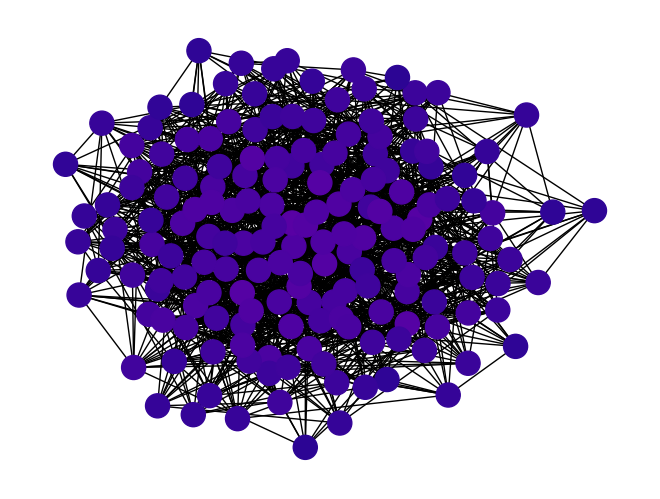

In [34]:
from matplotlib import cm
color_map = cm.get_cmap('plasma')
pos = nx.spring_layout(G)
nx.draw(K, node_color = [color_map(deg1[i]) for i in range(K.number_of_nodes())])

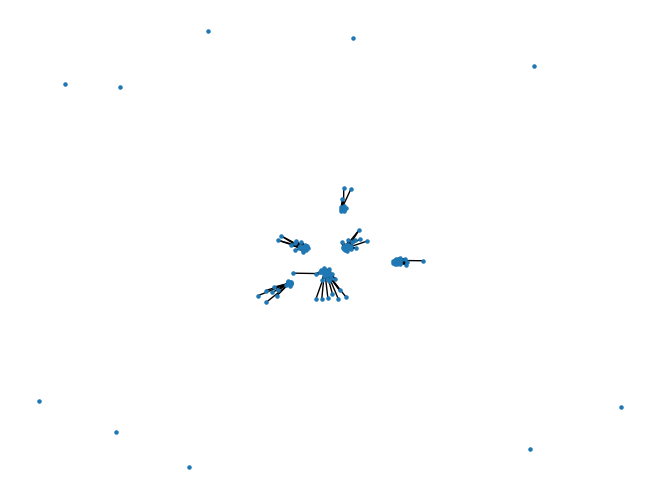

In [35]:
nx.draw(G, node_size = 5)

In [36]:
degreesG = (pd.DataFrame(sorted((dict(nx.degree(G)).values())))).describe()
degreesK = (pd.DataFrame(sorted((dict(nx.degree(K)).values())))).describe()
degreesG, degreesK

(                0
 count  172.000000
 mean    12.151163
 std      8.758645
 min      0.000000
 25%      4.000000
 50%     11.000000
 75%     19.000000
 max     34.000000,
                 0
 count  171.000000
 mean    17.017544
 std      3.893394
 min      9.000000
 25%     14.000000
 50%     17.000000
 75%     20.000000
 max     26.000000)

Based on the graph of the supposed organization's emails, it is fair to say that the skepticism is justified. A key difference between the two graphs is the connectedness of the two graphs. The graph of the known organization is not connected, with 16 connected components, 6 of which contain multiple nodes, and 10 of which are solitary nodes. In contrast, the proposed graph is connected, which is a significant difference between the two graphs. Looking further into the connectedness of the graphs, we see that the degrees of each individual node has a much larger range for the known graph, with some nodes connected to no other nodes and some connected to 34. The proposed graph has a higher lower end of 9 and a lower upper end of 25, and the summary statistics tell a similar story, with larger values of minimum, 25%, median, 75%, and mean for proposed graph. This would suggest that the proposed organization is much more connected as a whole, with no individual having less than 9 connections. As such, the structure of the two organizations appears to have drastic differences, with 1 large, very connected group for the proposed organization, compared to 6 groups that are strongly connected within, but not connected with each other with 10 other individual nodes separate. This difference in graphs suggests the skepticism about the organization is indeed well-founded. Further, since so few nodes have a small degree value, the skepticism about the type of data collected bears some weight as it seems unlikely that so many people in the company would be sending emails to such a large number of people. Given these differences in the two graphs, it would be fair to suggest that the skepticism is justified and the structure, or data type, is not similar for the two organizations

In [37]:
#2.8

Prior calculations show that the overarching structure of the company is 6 groups of employees and then 10 individuals working separately from these 6 groups. These 10 individuals could be inaccuracies in the data and may not exist, or they could be employees who are not involved in the day-to-day such as workers on leave. I would hypothesize that the remaining 6 groups would be branches of the company, fulfilling similar functions in different locations. From the density and average clustering coefficient of each cluster, we see that each subgraph has a relatively large clustering coefficient, ranging from 0.59 to 0.82 and each graph’s average clustering coefficient is larger than its density. This suggests that each graph is far from random and that it is likely to be a closely connected group. This is further seen in the weighted diameters, as the largest value of 35 is small in the context of emails sent, furthering the prior claim. Taking a closer look into these groups further supports this hypothesis. In cluster 0, we have 3 users with degree centrality above 0.9, who all have sent over 500 emails and lead all nodes in betweenness centrality. From that, it is likely that those 3 nodes, users 28, 171, and 147, are leaders of the branch given their centrality in the graph. Further, as we see that some nodes have degree centrality as small as 0.05, there are some users who are smaller contributors to the team. In figure 1, we can see that many nodes are clustered around the 3 nodes above, with the edges of largest weight stemming from those nodes. As such, there is a clear structure of leaders in a closely connected team. Cluster 1 appears similar to cluster 0 but with lower degree centrality as a whole, many more emails sent, and double the users. Yet, despite these differences, a similar structure exists, with a few nodes having large values for degree centrality, betweenness centrality, and emails sent, while others have far smaller values. Much like figure 1, figure 2 has central nodes with heavily weighted edges and outer nodes with less weight on the edges. As such, it would seem that cluster 1 is a larger team, but with similar structure to cluster 0. Clusters 2-5 follow similar patterns, leading me to believe that the structure of all 6 clusters is likely similar, with the main differences coming from size. The interconnectedness and similarity in structure of the 6 clusters supports my hypotheses as branches of the same company would likely have similar structure and function, while having no connections between them. The main reservations I have with my hypotheses is that there is limited knowledge on how data is collected. Without a time period, it is difficult to comment on individuals who did not send many emails. Further, without knowing how emails with multiple recipients are handled, it would be hard to make comments on the connection between users. 

In [38]:
subgraphs = [G.subgraph(list(nx.connected_components(G))[i]) for i in range(6)]

In [39]:
clustering = [nx.average_clustering(subgraphs[i]) for i in range(len(subgraphs))]
density = [nx.density(subgraphs[i]) for i in range(len(subgraphs))]
diams = [largest_diam(subgraphs[i]) for i in range(len(subgraphs))]

In [40]:
clustering, density, diams

([0.8264793076981798,
  0.6602622329530251,
  0.785917132737049,
  0.7835467715316489,
  0.5926368952684742,
  0.6973748473748475],
 [0.5770750988142292,
  0.34299516908212563,
  0.5141129032258065,
  0.4482758620689655,
  0.39766081871345027,
  0.5],
 [9, 13, 16, 35, 24, 20])

In [41]:
def total_weight(graph):
    weights = []
    for node in graph:
        x = []
        for i in range(len(graph.edges(node))):
            x.append(sum(list(list(graph.edges(node, data = True))[i][-1].values())))
        y = sum(x)
        weights.append(y)
    return(weights)

In [42]:
C0 = pd.DataFrame({'User ID':list(subgraphs[0].nodes), 'Deg Centrality': list(nx.degree_centrality(subgraphs[0]).values()), 'Betw Cen': list(nx.betweenness_centrality(subgraphs[0]).values()), 'Emails': total_weight(subgraphs[0])})
C1 = pd.DataFrame({'User ID':list(subgraphs[1].nodes), 'Deg Centrality': list(nx.degree_centrality(subgraphs[1]).values()), 'Betw Cen': list(nx.betweenness_centrality(subgraphs[1]).values()), 'Emails': total_weight(subgraphs[1])})
C2 = pd.DataFrame({'User ID':list(subgraphs[2].nodes), 'Deg Centrality': list(nx.degree_centrality(subgraphs[2]).values()), 'Betw Cen': list(nx.betweenness_centrality(subgraphs[2]).values()), 'Emails': total_weight(subgraphs[2])})
C3 = pd.DataFrame({'User ID':list(subgraphs[3].nodes), 'Deg Centrality': list(nx.degree_centrality(subgraphs[3]).values()), 'Betw Cen': list(nx.betweenness_centrality(subgraphs[3]).values()), 'Emails': total_weight(subgraphs[3])})
C4 = pd.DataFrame({'User ID':list(subgraphs[4].nodes), 'Deg Centrality': list(nx.degree_centrality(subgraphs[4]).values()), 'Betw Cen': list(nx.betweenness_centrality(subgraphs[4]).values()), 'Emails': total_weight(subgraphs[4])})
C5 = pd.DataFrame({'User ID':list(subgraphs[5].nodes), 'Deg Centrality': list(nx.degree_centrality(subgraphs[5]).values()), 'Betw Cen': list(nx.betweenness_centrality(subgraphs[5]).values()), 'Emails': total_weight(subgraphs[5])})

Cluster 1 Graph and Statistics

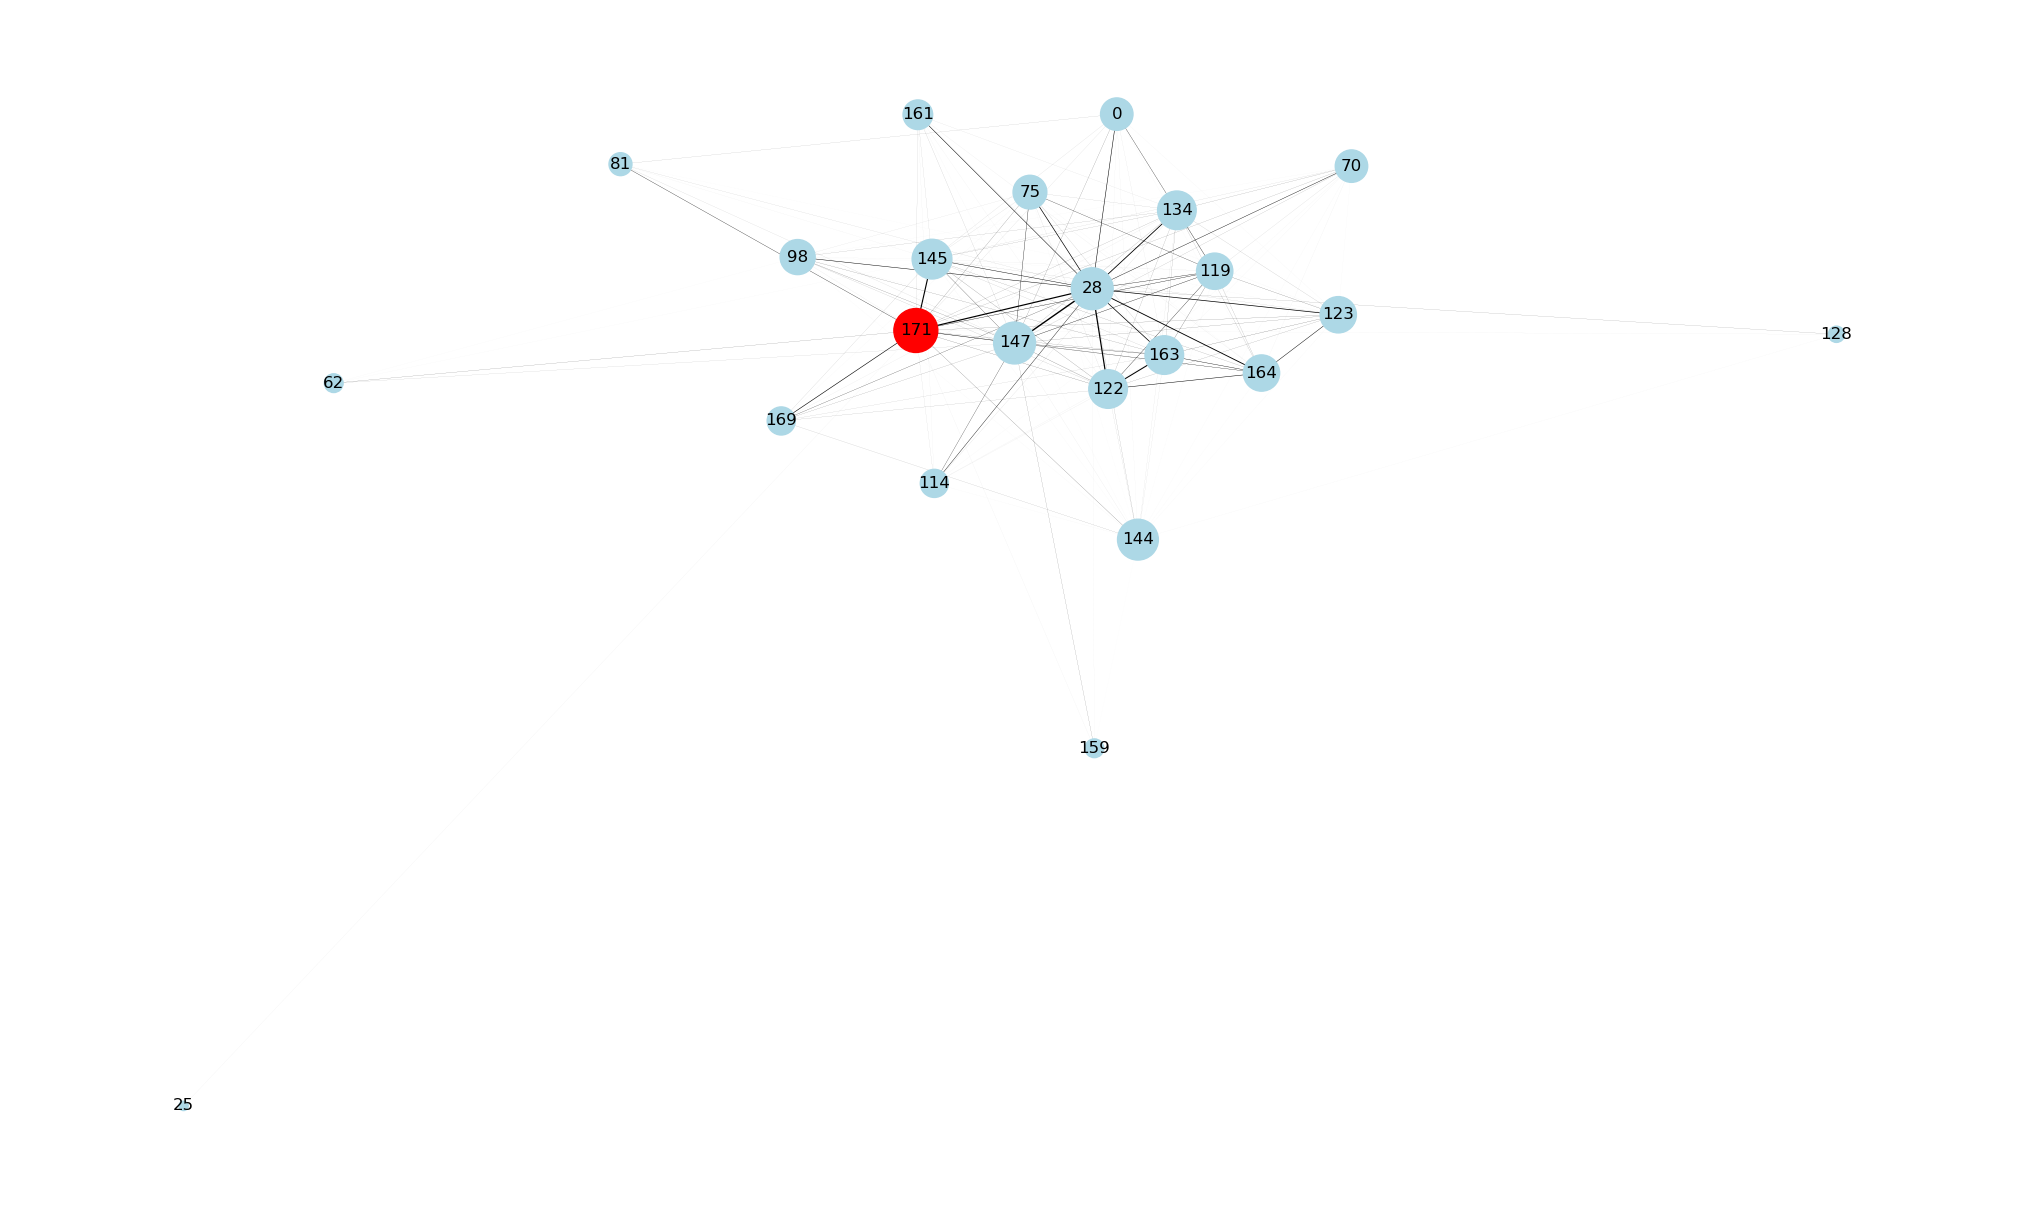

In [43]:
def prettyplot(graph, df, x, y, z, k):
    plt.figure(figsize=(x, y))
    pos = nx.spring_layout(graph, k = k)
    nx.draw(graph, pos, with_labels = True, node_size = [z*deg for deg in df['Deg Centrality']], node_color = ['red' if node  == int(df[df['Deg Centrality'] == max(df['Deg Centrality'])]['User ID']) else 'lightblue' for node in df['User ID']], width = [(graph[u][v]['weight']) / (max(nx.get_edge_attributes(graph, name = 'weight').values())) for u,v in graph.edges])
    
prettyplot(subgraphs[0], C0, 20, 12, 1000, 1)


## Figure 1

In [44]:
C0.sort_values('Emails', ascending = False).head(), C0['Deg Centrality'].describe(),C0.sort_values('Deg Centrality', ascending = False).head() , C0.sort_values('Betw Cen', ascending = False).head()

(    User ID  Deg Centrality  Betw Cen  Emails
 7        28        0.909091  0.064594    1541
 13      171        1.000000  0.180755     712
 5       147        0.909091  0.060265     595
 21      122        0.772727  0.012213     540
 10      163        0.772727  0.012213     448,
 count    23.000000
 mean      0.577075
 std       0.273564
 min       0.045455
 25%       0.409091
 50%       0.636364
 75%       0.772727
 max       1.000000
 Name: Deg Centrality, dtype: float64,
     User ID  Deg Centrality  Betw Cen  Emails
 13      171        1.000000  0.180755     712
 5       147        0.909091  0.060265     595
 7        28        0.909091  0.064594    1541
 3       144        0.863636  0.050452      67
 4       145        0.818182  0.033612     342,
     User ID  Deg Centrality  Betw Cen  Emails
 13      171        1.000000  0.180755     712
 7        28        0.909091  0.064594    1541
 5       147        0.909091  0.060265     595
 3       144        0.863636  0.050452      67


Cluster 2 Statistics and Graph

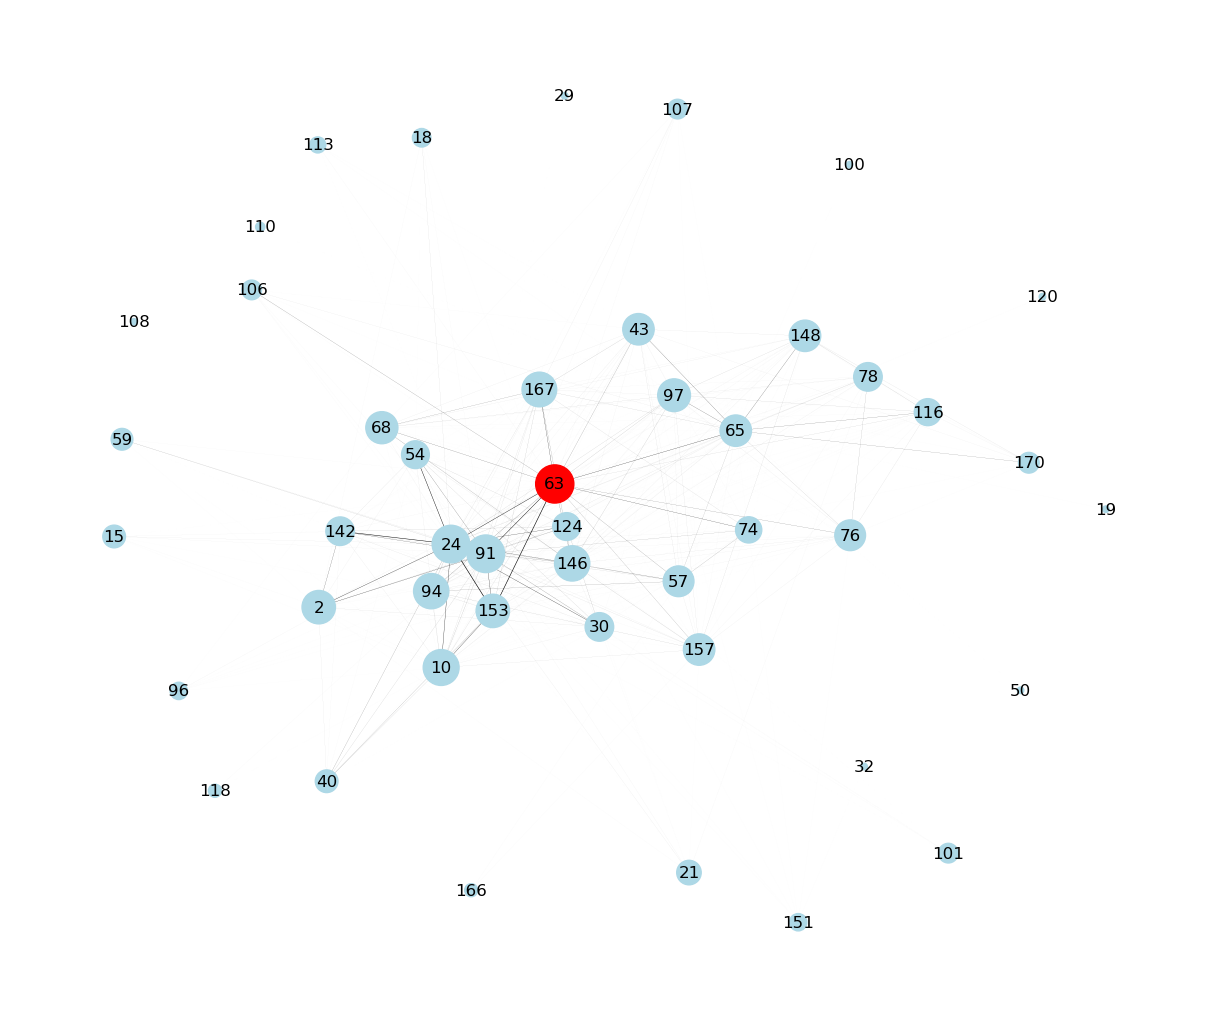

In [45]:
prettyplot(subgraphs[1], C1, 12, 10, 1000, 5)


## Figure 2

In [46]:
C1.sort_values('Emails', ascending = False).head(), C1['Deg Centrality'].describe(),C1.sort_values('Deg Centrality', ascending = False).head() , C1.sort_values('Betw Cen', ascending = False).head()

(    User ID  Deg Centrality  Betw Cen  Emails
 10       24        0.733333  0.090769    8594
 31       91        0.733333  0.061953    5658
 25       63        0.755556  0.102056    5309
 11      153        0.577778  0.018217    3408
 26       65        0.511111  0.097835    2150,
 count    46.000000
 mean      0.342995
 std       0.230543
 min       0.022222
 25%       0.155556
 50%       0.366667
 75%       0.511111
 max       0.755556
 Name: Deg Centrality, dtype: float64,
     User ID  Deg Centrality  Betw Cen  Emails
 25       63        0.755556  0.102056    5309
 31       91        0.733333  0.061953    5658
 10       24        0.733333  0.090769    8594
 1        10        0.666667  0.075524    1616
 32       94        0.644444  0.068846    1016,
     User ID  Deg Centrality  Betw Cen  Emails
 25       63        0.755556  0.102056    5309
 26       65        0.511111  0.097835    2150
 10       24        0.733333  0.090769    8594
 1        10        0.666667  0.075524    1616


Graph and Statistics for Cluster 3

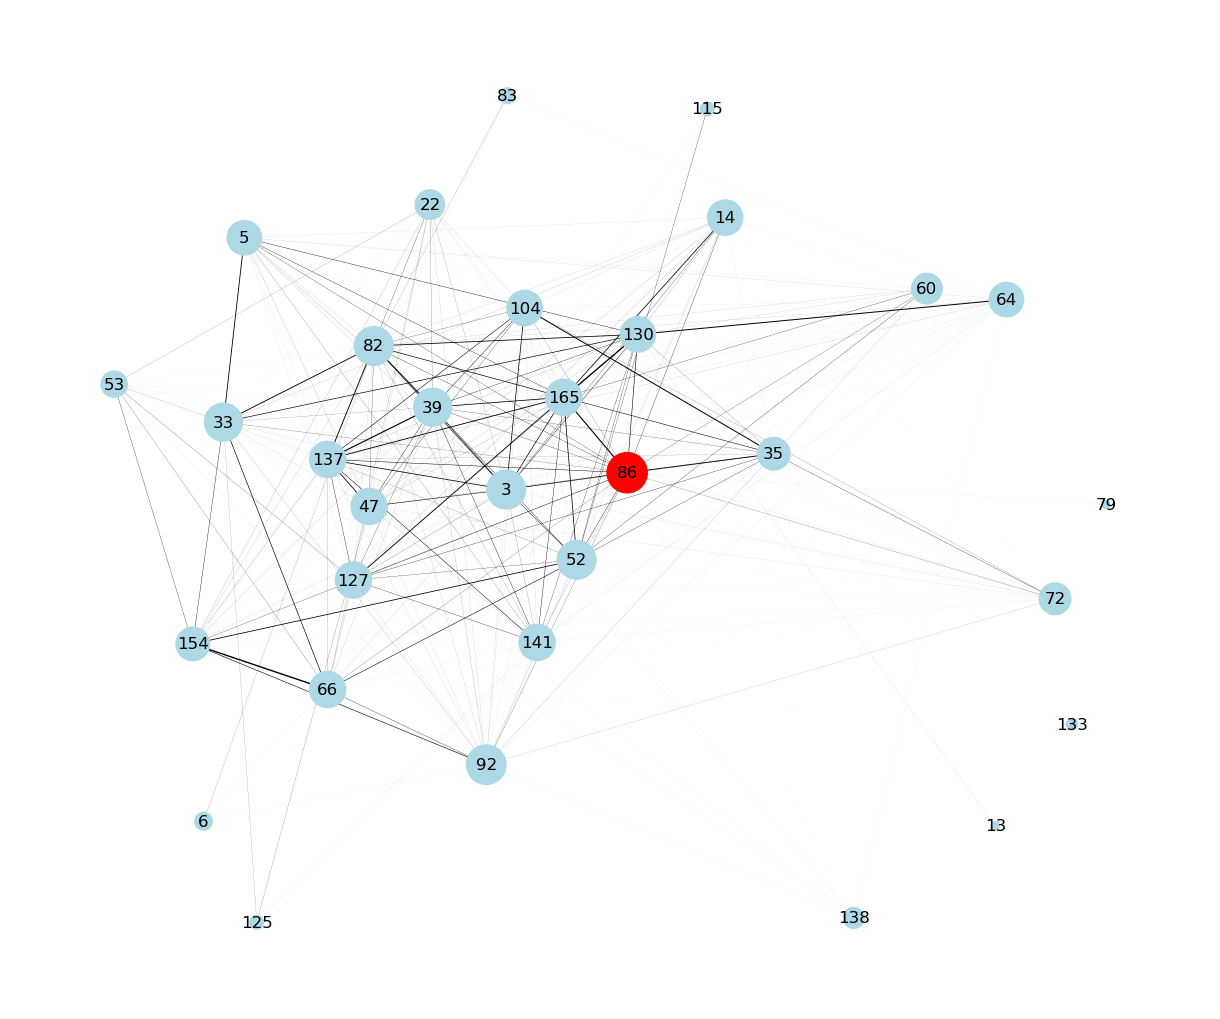

In [47]:
prettyplot(subgraphs[2], C2, 12, 10, 1000, 5)

## Figure 3

In [48]:
C2.sort_values('Emails', ascending = False).head(), C2['Deg Centrality'].describe(),C2.sort_values('Deg Centrality', ascending = False).head() , C2.sort_values('Betw Cen', ascending = False).head()


(    User ID  Deg Centrality  Betw Cen  Emails
 14      165        0.677419  0.005440    1427
 5       137        0.677419  0.019134    1109
 26       86        0.838710  0.091511    1072
 0       130        0.645161  0.068147    1007
 1         3        0.774194  0.022626     980,
 count    32.000000
 mean      0.514113
 std       0.262442
 min       0.032258
 25%       0.322581
 50%       0.629032
 75%       0.677419
 max       0.838710
 Name: Deg Centrality, dtype: float64,
     User ID  Deg Centrality  Betw Cen  Emails
 26       86        0.838710  0.091511    1072
 27       92        0.806452  0.046109     315
 24       82        0.774194  0.040597     976
 17       52        0.774194  0.029424     742
 1         3        0.774194  0.022626     980,
     User ID  Deg Centrality  Betw Cen  Emails
 26       86        0.838710  0.091511    1072
 0       130        0.645161  0.068147    1007
 12       33        0.741935  0.064961     658
 21       66        0.677419  0.050428     580


Cluster 4

(    User ID  Deg Centrality  Betw Cen  Emails
 6        23        0.857143  0.095542    1645
 3       140        0.571429  0.021006    1319
 24       80        0.642857  0.009461    1051
 11      156        0.678571  0.040117    1031
 10       27        0.607143  0.008952     894,
 count    29.000000
 mean      0.448276
 std       0.255334
 min       0.035714
 25%       0.178571
 50%       0.500000
 75%       0.642857
 max       0.857143
 Name: Deg Centrality, dtype: float64,
     User ID  Deg Centrality  Betw Cen  Emails
 6        23        0.857143  0.095542    1645
 9       155        0.821429  0.078126     689
 0         7        0.785714  0.139079     605
 2        11        0.714286  0.026406     459
 17       44        0.714286  0.130874     704,
     User ID  Deg Centrality  Betw Cen  Emails
 0         7        0.785714  0.139079     605
 17       44        0.714286  0.130874     704
 6        23        0.857143  0.095542    1645
 9       155        0.821429  0.078126     689


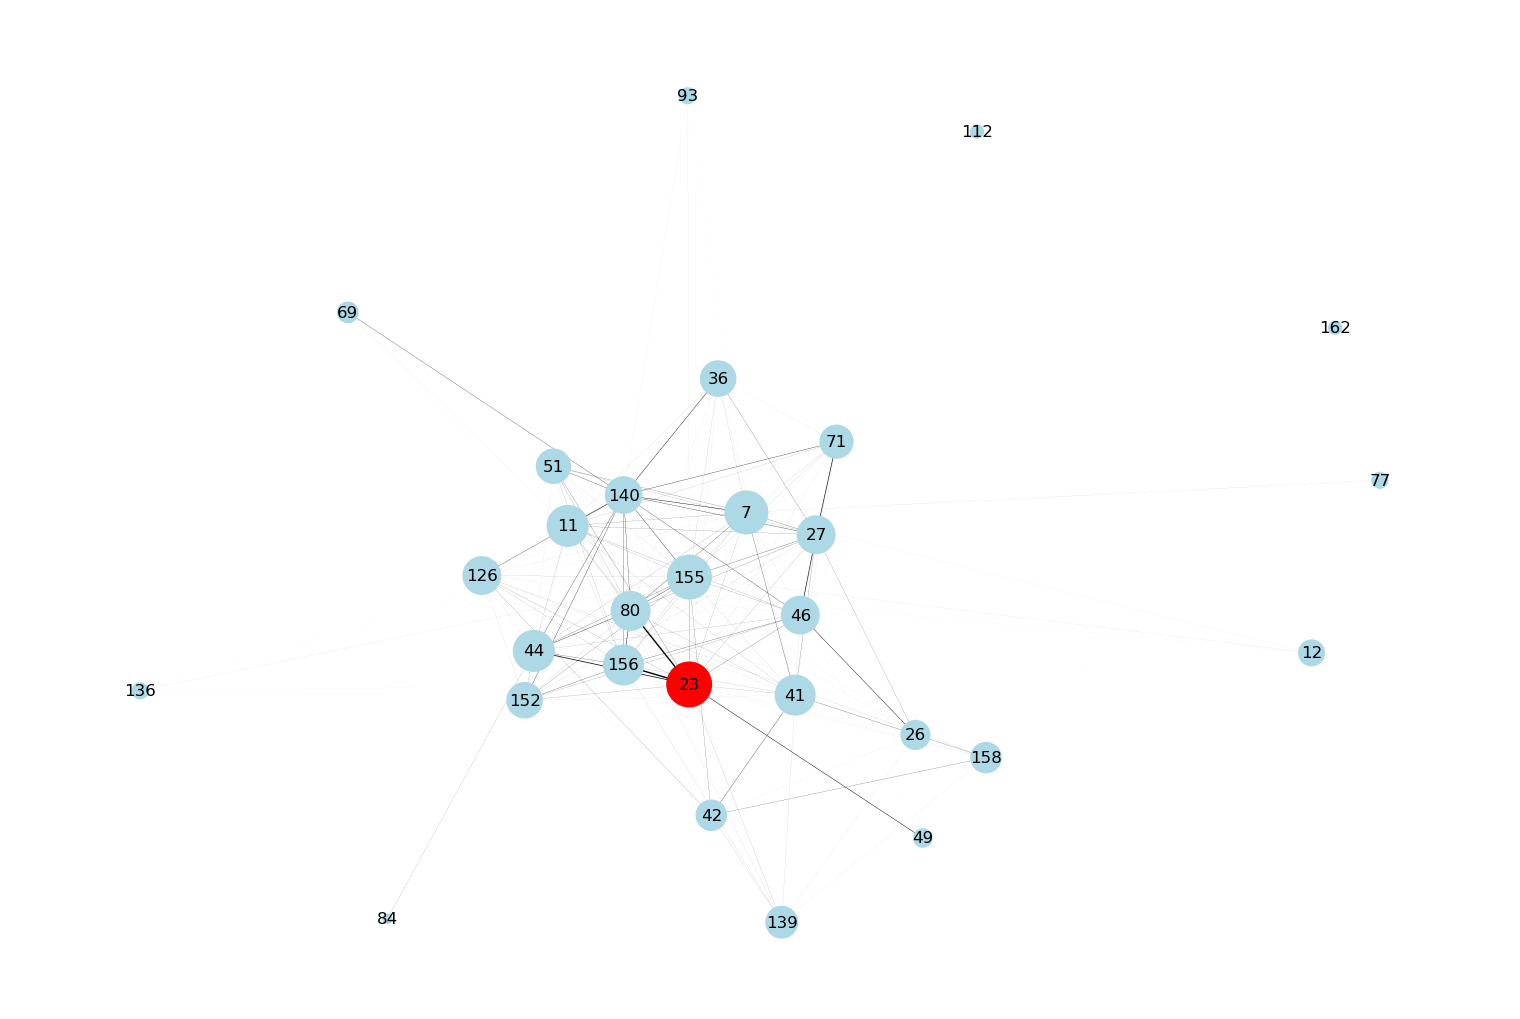

In [49]:
prettyplot(subgraphs[3], C3, 15, 10, 1200, 3)
C3.sort_values('Emails', ascending = False).head(), C3['Deg Centrality'].describe(),C3.sort_values('Deg Centrality', ascending = False).head(), C3.sort_values('Betw Cen', ascending = False).head() 


## Figure 4

Cluster 5

(    User ID  Deg Centrality  Betw Cen  Emails
 10       56        0.888889  0.450903    2678
 2       135        0.611111  0.006458    1230
 16      103        0.555556  0.001634    1008
 3         9        0.611111  0.112745     959
 17      111        0.666667  0.045674     808,
 count    19.000000
 mean      0.397661
 std       0.280397
 min       0.055556
 25%       0.055556
 50%       0.500000
 75%       0.611111
 max       0.888889
 Name: Deg Centrality, dtype: float64,
     User ID  Deg Centrality  Betw Cen  Emails
 10       56        0.888889  0.450903    2678
 17      111        0.666667  0.045674     808
 8       168        0.666667  0.117569     600
 12       85        0.611111  0.006458     343
 2       135        0.611111  0.006458    1230,
     User ID  Deg Centrality  Betw Cen  Emails
 10       56        0.888889  0.450903    2678
 8       168        0.666667  0.117569     600
 3         9        0.611111  0.112745     959
 17      111        0.666667  0.045674     808


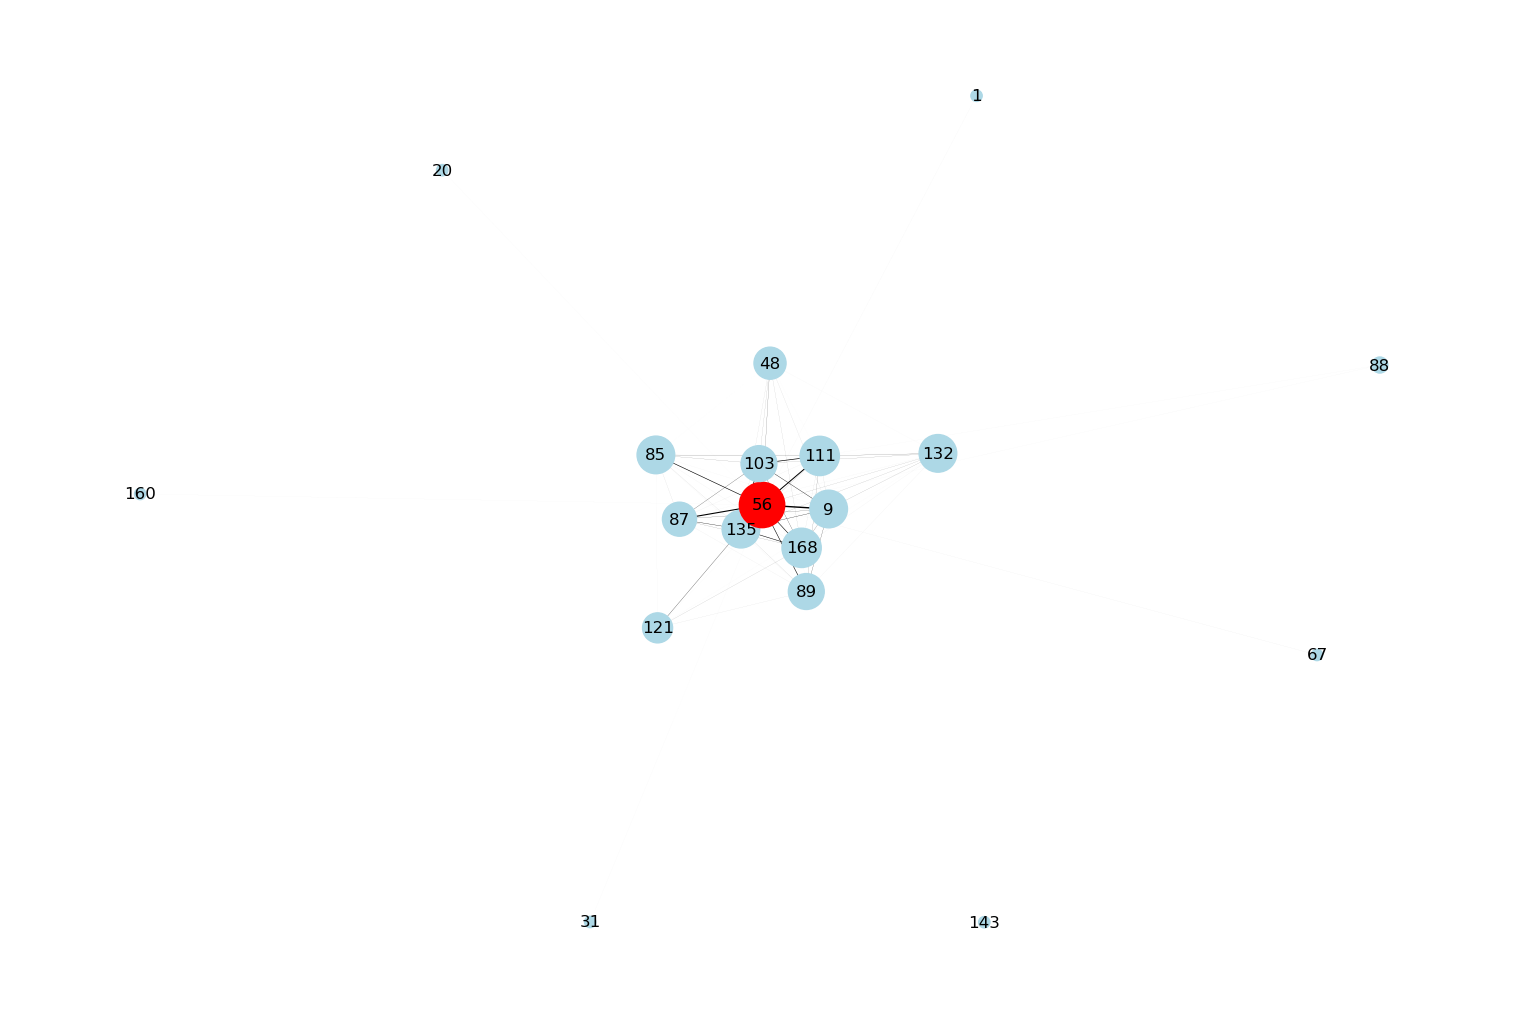

In [50]:
prettyplot(subgraphs[4], C4, 15, 10, 1200, 2)
C4.sort_values('Emails', ascending = False).head(), C4['Deg Centrality'].describe(),C4.sort_values('Deg Centrality', ascending = False).head(), C4.sort_values('Betw Cen', ascending = False).head() 


## Figure 5

Cluster 6

(    User ID  Deg Centrality  Betw Cen  Emails
 5        73        0.750000  0.054545     898
 7        45        0.666667  0.011616     837
 2        37        0.750000  0.102525     614
 11       58        0.833333  0.221212     490
 10       55        0.750000  0.178283     353,
 count    13.000000
 mean      0.500000
 std       0.272166
 min       0.083333
 25%       0.250000
 50%       0.583333
 75%       0.750000
 max       0.833333
 Name: Deg Centrality, dtype: float64,
     User ID  Deg Centrality  Betw Cen  Emails
 11       58        0.833333  0.221212     490
 2        37        0.750000  0.102525     614
 5        73        0.750000  0.054545     898
 10       55        0.750000  0.178283     353
 7        45        0.666667  0.011616     837,
     User ID  Deg Centrality  Betw Cen  Emails
 11       58        0.833333  0.221212     490
 10       55        0.750000  0.178283     353
 2        37        0.750000  0.102525     614
 0        99        0.583333  0.060606      54


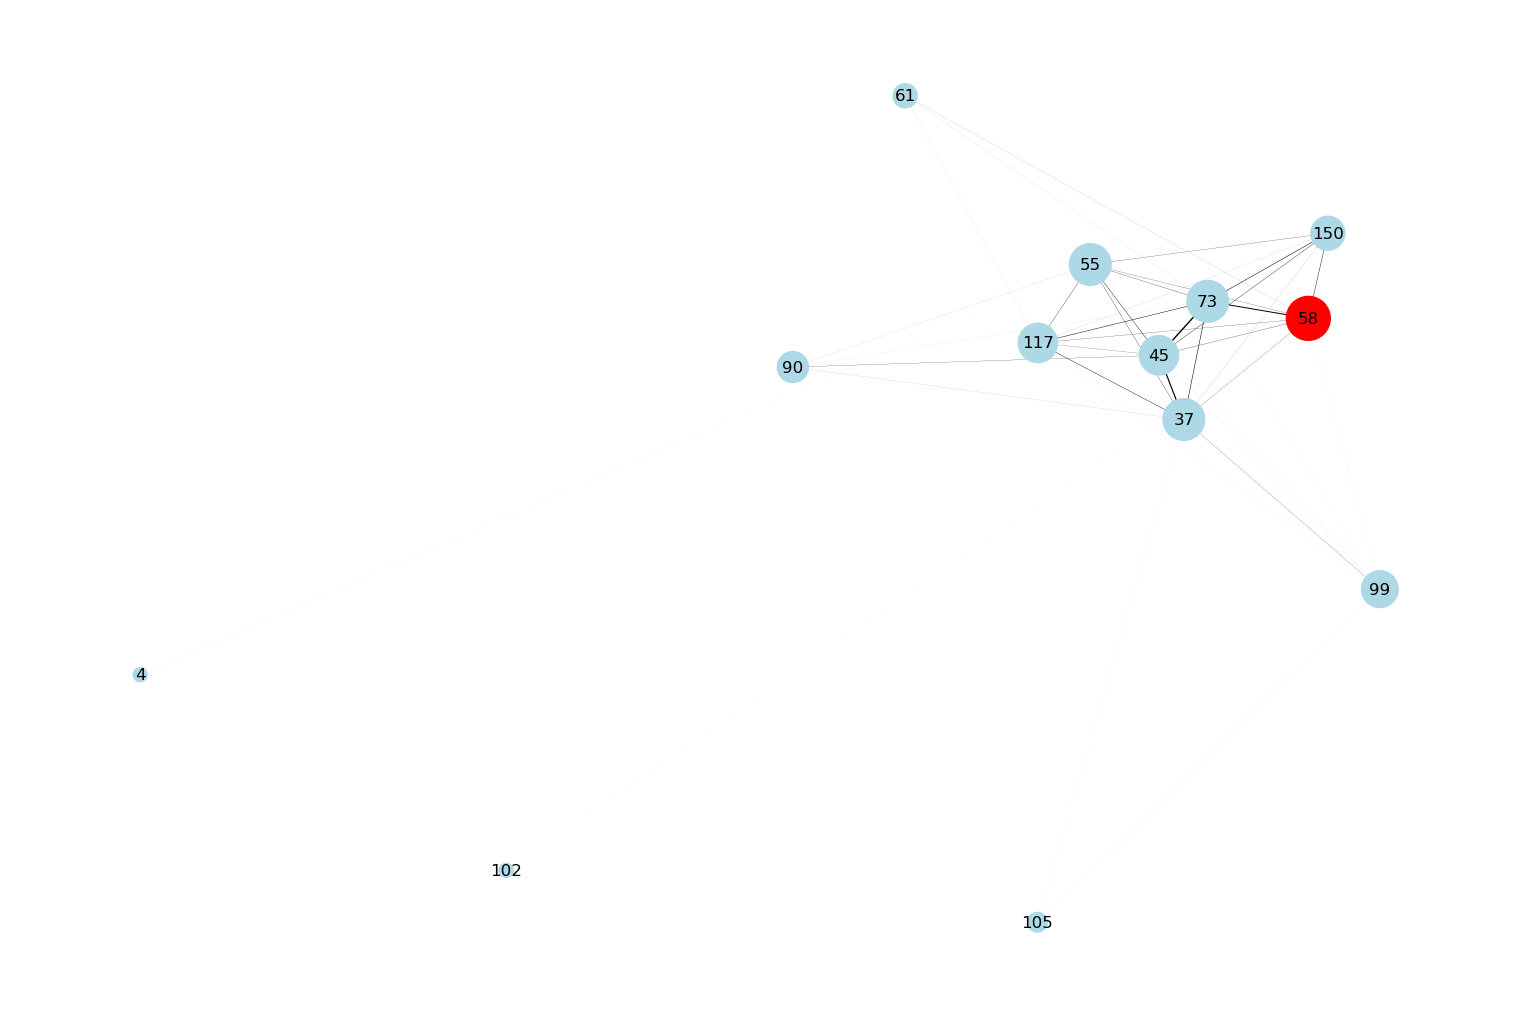

In [51]:
prettyplot(subgraphs[5], C5, 15, 10, 1200, 3)
C5.sort_values('Emails', ascending = False).head(), C5['Deg Centrality'].describe(),C5.sort_values('Deg Centrality', ascending = False).head(), C5.sort_values('Betw Cen', ascending = False).head()


## Figure 6